Weighted Graph

Let the set of bases be
$$ \mathcal{B} = \{A, C, G, U\} $$

We have strings of $\ell = 3$ bases for a codon. Then, let the space of all strings be
$$ V = \mathcal{B}^{\ell} $$

Let $E$ be a set of edges (2-tuples) corresponding to all possible point mutations, e.g. $(UAU, UAG) \in E$

Let $w: E \to \mathbb{R}^+$ be a function that assigns a weight to each edge

Let $G$ be a weighted undirected graph with nodes in $V$ and edges in $E$ with weights according to $w$.

In [44]:
import numpy as np
import networkx as nx
from itertools import product
import random
import matplotlib.pyplot as plt

In [45]:
length = 3
alphabet = ['A', 'C', 'G', 'U']
nodes = [''.join(p) for p in product(alphabet, repeat=length)]
print(nodes)

['AAA', 'AAC', 'AAG', 'AAU', 'ACA', 'ACC', 'ACG', 'ACU', 'AGA', 'AGC', 'AGG', 'AGU', 'AUA', 'AUC', 'AUG', 'AUU', 'CAA', 'CAC', 'CAG', 'CAU', 'CCA', 'CCC', 'CCG', 'CCU', 'CGA', 'CGC', 'CGG', 'CGU', 'CUA', 'CUC', 'CUG', 'CUU', 'GAA', 'GAC', 'GAG', 'GAU', 'GCA', 'GCC', 'GCG', 'GCU', 'GGA', 'GGC', 'GGG', 'GGU', 'GUA', 'GUC', 'GUG', 'GUU', 'UAA', 'UAC', 'UAG', 'UAU', 'UCA', 'UCC', 'UCG', 'UCU', 'UGA', 'UGC', 'UGG', 'UGU', 'UUA', 'UUC', 'UUG', 'UUU']


In [46]:
def differs_by_one(s1, s2):
    return sum(a != b for a, b in zip(s1, s2)) == 1

$G$ without weights

In [47]:
G = nx.Graph()
G.add_nodes_from(nodes)

for i, node1 in enumerate(nodes):
    for node2 in nodes[i + 1:]:
        if differs_by_one(node1, node2):
            G.add_edge(node1, node2)

Sample of $G$, for visibility

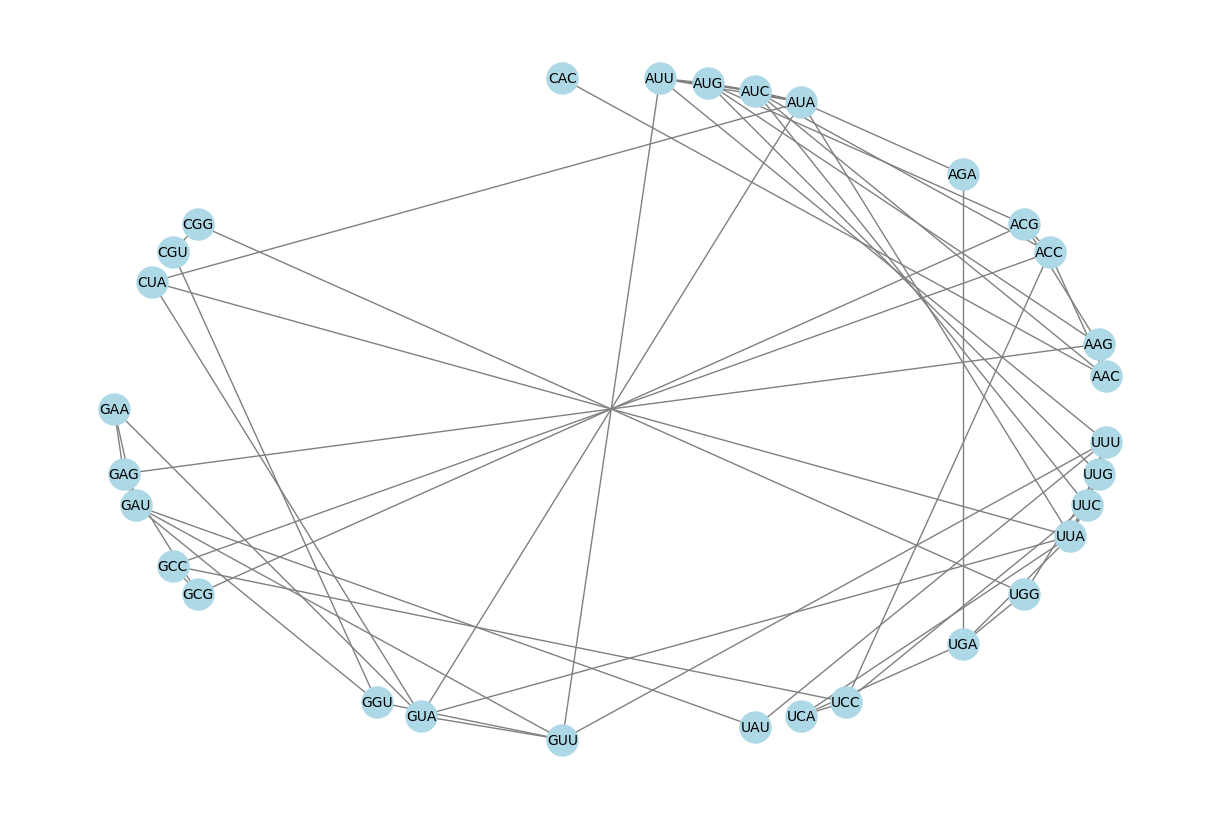

In [48]:
sample_size = 30  # Number of nodes to display in the sample
random.seed(42)
sample_nodes = random.sample(nodes, sample_size)
subgraph = G.subgraph(sample_nodes)

plt.figure(figsize=(12, 8))

# pos = nx.spring_layout(subgraph, seed=42)
pos = nx.circular_layout(G)

nx.draw(subgraph, pos, with_labels=True, node_color='lightblue',
        edge_color='gray', node_size=500, font_size=10)
plt.show()

Weighted $G$, where changes in the 1,2,3 position cost 3,2,1

In [49]:
def weight(s1, s2):
    diff = (np.array(list(s1) == np.array(list(s2)))).astype(int)
    if sum(diff) == 2:
        if diff[0] == 0:
            return 3
        if diff[1] == 0:
            return 2
        if diff[2] == 0:
            return 1
    else:
        return False

In [50]:
G2 = nx.Graph()
G2.add_nodes_from(nodes)

for i, node1 in enumerate(nodes):
    for node2 in nodes[i + 1:]:
        w = weight(node1, node2)
        if w:
            G2.add_edge(node1, node2, weight=w)

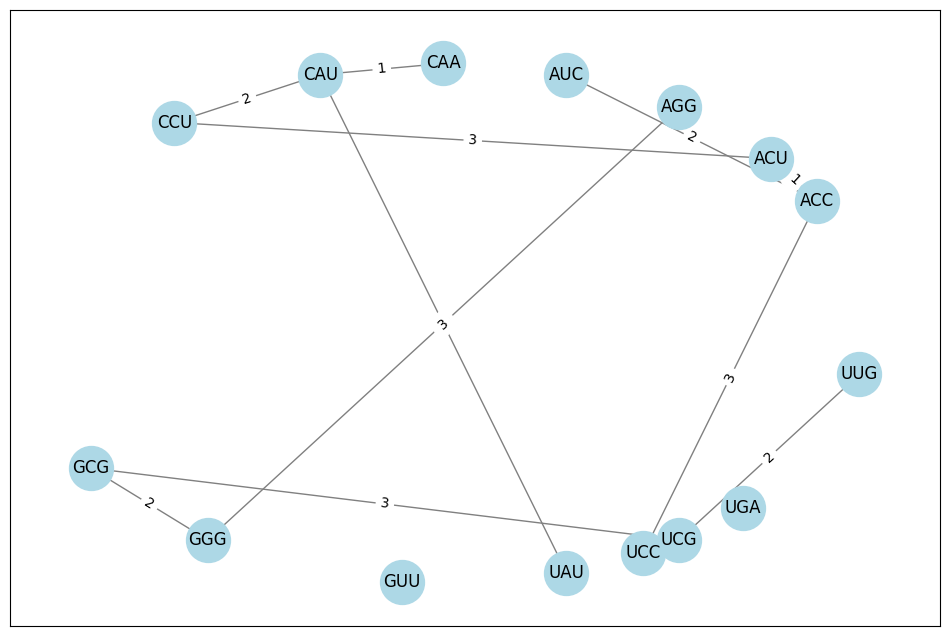

In [51]:
sample_size = 15  # Number of nodes to display in the sample
random.seed(2)
sample_nodes = random.sample(nodes, sample_size)
subgraph = G2.subgraph(sample_nodes)

plt.figure(figsize=(12, 8))

# pos = nx.spring_layout(subgraph, seed=42)
pos = nx.circular_layout(G2)

nx.draw_networkx_nodes(subgraph, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(subgraph, pos, edge_color='gray')
nx.draw_networkx_labels(subgraph, pos, font_size=12)
nx.draw_networkx_edge_labels(subgraph, pos, nx.get_edge_attributes(subgraph, "weight"))

plt.show()

Consider taking a set of some nodes from the graph $G$, and call this $S$. For example,
$$ S = \{UUU, UAG, CAU\} $$

Then let the 'the graph of $S$ inside the graph $G$' be the subgraph that includes all nodes in $S$ and all nodes adjacent to at least one node in $S$, using only edges that are connected to nodes in $S$.

This weight function performs the distribution defined in Table 1.

In [52]:
def weight(s1, s2):
    s1 = list(s1)
    s2 = list(s2)
    diff = (np.array(s1) == np.array(s2)).astype(int)
    if sum(diff) == 2:
        if (s1[2] == "U" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "U"):
            return 2
        if (s1[2] == "A" and s2[2] == "C") or (s1[2] == "C" and s2[2] == "A"):
            return 2
        if (s1[2] == "A" and s2[2] == "U") or (s1[2] == "U" and s2[2] == "A"):
            return 2
        if (s1[2] == "C" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "C"):
            return 2
        
        if (s1[2] == "U" and s2[2] == "C") or (s1[2] == "C" and s2[2] == "U"):
            return 4
        if (s1[2] == "A" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "A"):
            return 4
        else:
            return 1
    else:
        return False

Let us reproduce Figure 2

In [53]:
G3 = nx.Graph()

S = ["ACG", "ACU", "ACA", "ACC"]
for i, node1 in enumerate(S):
    for node2 in nodes:
        if node2 == node1:
            continue
        w = weight(node1, node2)
        if w:
            G3.add_edge(node1, node2, weight=w)

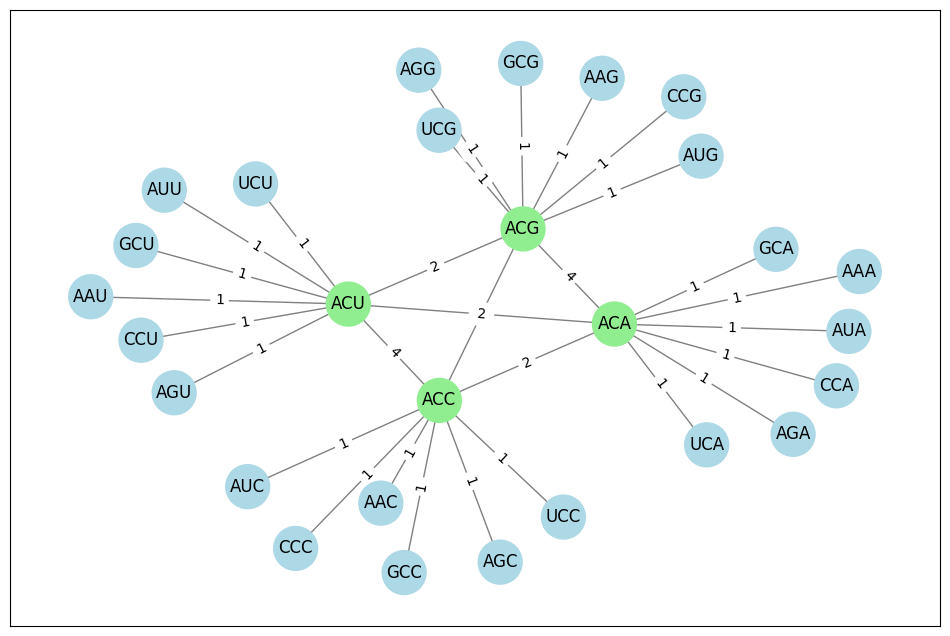

In [54]:
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G3, seed=3)

node_colors = ['lightgreen' if node in S else 'lightblue' for node in G3.nodes()]
nx.draw_networkx_nodes(G3, pos, node_size=1000, node_color=node_colors)
nx.draw_networkx_edges(G3, pos, edge_color='gray')
nx.draw_networkx_labels(G3, pos, font_size=12)
nx.draw_networkx_edge_labels(G3, pos, nx.get_edge_attributes(G3, "weight"))

plt.show()

plt.show()

### Conductance and Robustness

Define conductance of a 'graph of $S$ inside the graph $G$' to be the sum of all weights in the graph, not between any two nodes in $S$, divided by the sum over each of the nodes of $S$ of all weights connected to that node. That is, weights between two nodes in $S$ will not be counted towards the numerator, and will instead be double counted in the denominator.

This means if there are only connections between nodes in $S$, the conductance is 0, and if no two nodes in $S$ share a connection, the conductance will be 1.

Namely, if the only possible mutations keeps you within $S$, you have conduntance, which can be read as 'ability to leave', of 0. Similarly, if all possible point mutations take you to a node outside of $S$, you have conductance one, so your 'ability to leave' is 1.

The point of all this is to say that, if our codon mapping has $$S=\{CUA, CUC, CUG, CUU, UUA, UUG\} $$ all mapping to Leucine, and then we find that this set $S$ has conductance $0.47$, we can quantify how likely it is to mutate from a Leucine map. If we do this for all such sets $S$ which code a particular acid in the full mapping, we can sum all of their conductances, with some normalisation between 0 and 1, to quantify the robustness. Namely, the robustness will be 1 minus this 'general' conductance.

As an extreme, which is undoubtedly impossible, if each set $S$ in the codon map, which each codes a particular acid, had conductance of 0, then the full mapping would never be able to change under a point mutation. This is a robustness of 1.

Thus, given a table as in Table 1 in the paper and a mapping, one can calculate this robustness.

In [55]:
def conductance(S, G):
    numerator = 0
    for edge, w in nx.get_edge_attributes(G, "weight").items():
        node1, node2 = edge
        if node1 in S and node2 in S:
            continue
        else:
            numerator += w
    
    denominator = 0
    for node in S:
        weights = [d.get('weight', 1) for _, _, d in G.edges(node, data=True)]
        denominator += np.sum(weights)

    return numerator / denominator

In [56]:
print(conductance(S, G3))

0.42857142857142855


which is the same value as the paper

There are $3 {4\choose 2} = 18$ weights associated to transitions (see Table 1).

In [57]:
def weight_table1(s1, s2):
    s1 = list(s1)
    s2 = list(s2)
    diff = (np.array(s1) == np.array(s2)).astype(int)
    if sum(diff) == 2:
        if (s1[2] == "U" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "U"):
            return 2
        if (s1[2] == "A" and s2[2] == "C") or (s1[2] == "C" and s2[2] == "A"):
            return 2
        if (s1[2] == "A" and s2[2] == "U") or (s1[2] == "U" and s2[2] == "A"):
            return 2
        if (s1[2] == "C" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "C"):
            return 2
        
        if (s1[2] == "U" and s2[2] == "C") or (s1[2] == "C" and s2[2] == "U"):
            return 4
        if (s1[2] == "A" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "A"):
            return 4
        else:
            return 1
    else:
        return False

#### Leucine

In [58]:
G_leucine = nx.Graph()

S = ["CUA", "CUC", "CUG", "CUU", "UUA", "UUG"]
for i, node1 in enumerate(S):
    for node2 in nodes:
        if node2 == node1:
            continue
        w = weight_table1(node1, node2)
        if w:
            G_leucine.add_edge(node1, node2, weight=w)
            
print(conductance(S, G_leucine))  # == 10/21 as in paper

0.47619047619047616


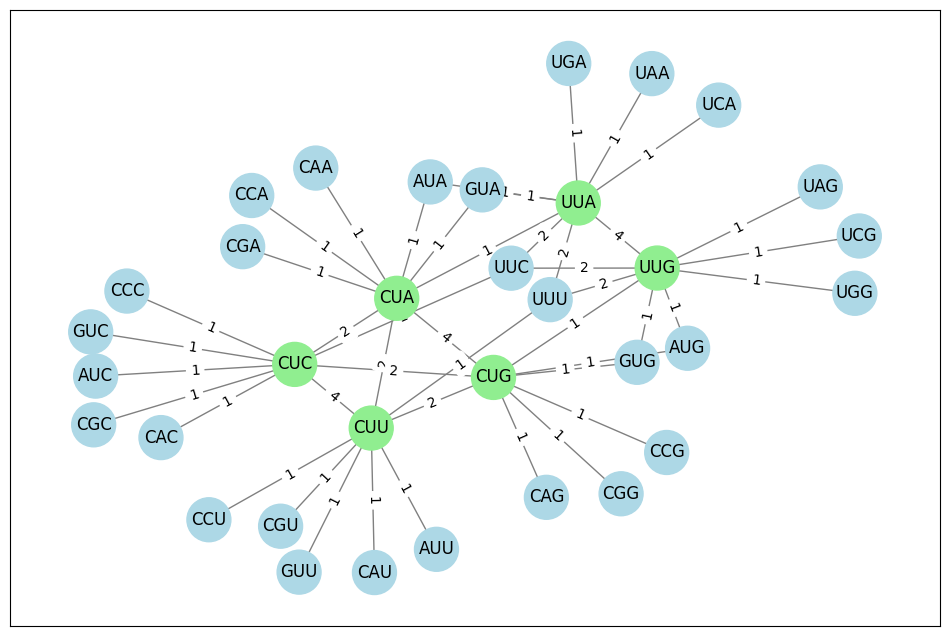

In [59]:
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G_leucine, seed=3)

node_colors = ['lightgreen' if node in S else 'lightblue' for node in G_leucine.nodes()]
nx.draw_networkx_nodes(G_leucine, pos, node_size=1000, node_color=node_colors)
nx.draw_networkx_edges(G_leucine, pos, edge_color='gray')
nx.draw_networkx_labels(G_leucine, pos, font_size=12)
nx.draw_networkx_edge_labels(G_leucine, pos, nx.get_edge_attributes(G_leucine, "weight"))

plt.show()

#### Serine

In [60]:
G_serine = nx.Graph()

S = ["UCU", "UCC", "UCA", "UCG", "AGU", "AGC"]
for i, node1 in enumerate(S):
    for node2 in nodes:
        if node2 == node1:
            continue
        w = weight_table1(node1, node2)
        if w:
            G_serine.add_edge(node1, node2, weight=w)
            
print(conductance(S, G_serine))  # == 11/21 as in paper

0.5238095238095238


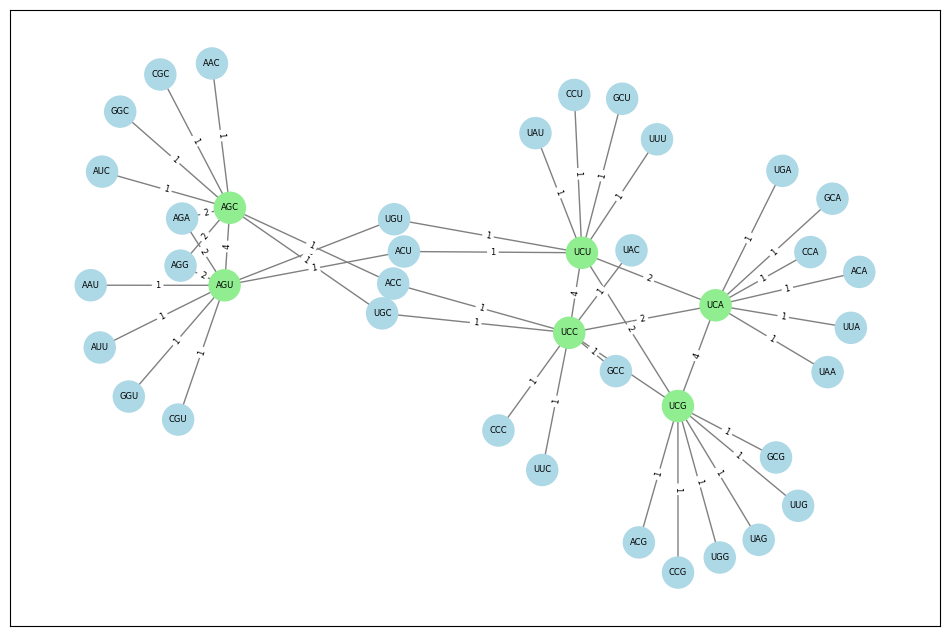

In [61]:
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G_serine, seed=14)

node_colors = ['lightgreen' if node in S else 'lightblue' for node in G_serine.nodes()]
nx.draw_networkx_nodes(G_serine, pos, node_size=500, node_color=node_colors)
nx.draw_networkx_edges(G_serine, pos, edge_color='gray')
nx.draw_networkx_labels(G_serine, pos, font_size=6)
nx.draw_networkx_edge_labels(G_serine, pos, nx.get_edge_attributes(G_serine, "weight"), font_size=6)

plt.show()

#### Stop signal

In [62]:
G_stop = nx.Graph()

S = ["UAA", "UAG", "UGA"]
for i, node1 in enumerate(S):
    for node2 in nodes:
        if node2 == node1:
            continue
        w = weight_table1(node1, node2)
        if w:
            G_stop.add_edge(node1, node2, weight=w)
            
print(conductance(S, G_stop))  # == 16/21 as in paper

0.7619047619047619


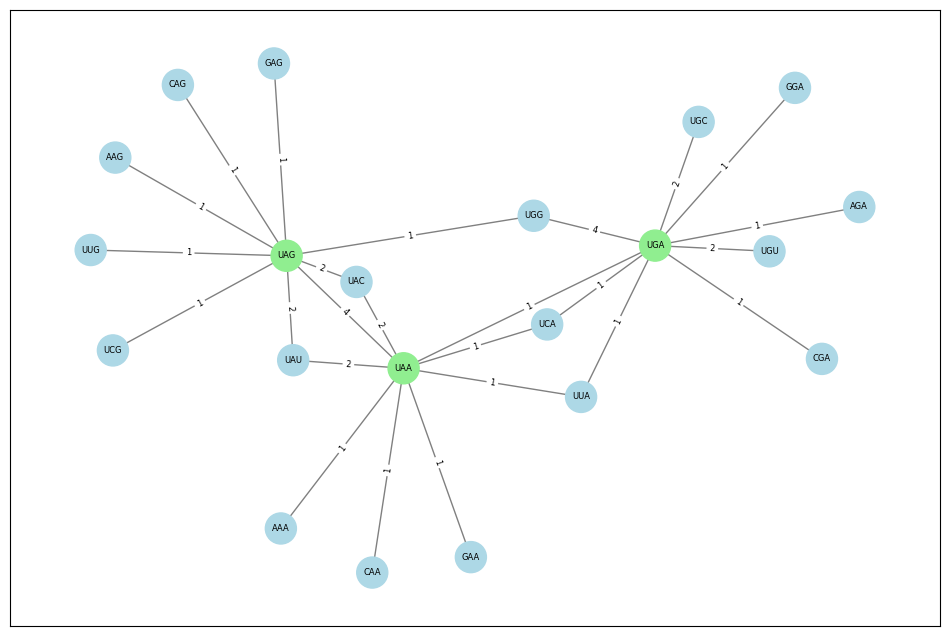

In [63]:
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G_stop, seed=1)

node_colors = ['lightgreen' if node in S else 'lightblue' for node in G_stop.nodes()]
nx.draw_networkx_nodes(G_stop, pos, node_size=500, node_color=node_colors)
nx.draw_networkx_edges(G_stop, pos, edge_color='gray')
nx.draw_networkx_labels(G_stop, pos, font_size=6)
nx.draw_networkx_edge_labels(G_stop, pos, nx.get_edge_attributes(G_stop, "weight"), font_size=6)

plt.show()

### Standard Genetic Code

the SGC has a mapping given below

In [64]:
SGC = [
    ["UUU", "UUC"],  # Phenylalanine (Phe)
    ["UUA", "UUG", "CUU", "CUC", "CUA", "CUG"],  # Leucine (Leu)
    ["AUU", "AUC", "AUA"],  # Isoleucine (Ile)
    ["AUG"],  # Methionine (Met) - Start codon
    ["GUU", "GUC", "GUA", "GUG"],  # Valine (Val)
    ["UCU", "UCC", "UCA", "UCG", "AGU", "AGC"],  # Serine (Ser)
    ["CCU", "CCC", "CCA", "CCG"],  # Proline (Pro)
    ["ACU", "ACC", "ACA", "ACG"],  # Threonine (Thr)
    ["GCU", "GCC", "GCA", "GCG"],  # Alanine (Ala)
    ["UAU", "UAC"],  # Tyrosine (Tyr)
    ["UAA", "UAG", "UGA"],  # Stop codons
    ["CAU", "CAC"],  # Histidine (His)
    ["CAA", "CAG"],  # Glutamine (Gln)
    ["AAU", "AAC"],  # Asparagine (Asn)
    ["AAA", "AAG"],  # Lysine (Lys)
    ["GAU", "GAC"],  # Aspartic acid (Asp)
    ["GAA", "GAG"],  # Glutamic acid (Glu)
    ["UGU", "UGC"],  # Cysteine (Cys)
    ["UGG"],  # Tryptophan (Trp)
    ["CGU", "CGC", "CGA", "CGG", "AGA", "AGG"],  # Arginine (Arg)
    ["GGU", "GGC", "GGA", "GGG"],  # Glycine (Gly)
]

#### Using all weights set to one

In [65]:
conductances = []

for S in SGC:
    G = nx.Graph()
    for i, node1 in enumerate(S):
        for node2 in nodes:
            if node2 == node1:
                continue
            w = differs_by_one(node1, node2)
            if w:
                G.add_edge(node1, node2, weight=w)
                
    conductances.append(conductance(S, G))

print(np.mean(conductances))

0.8112874779541447


Which matches result in Table 1 from older paper "Robustness against point mutations of genetic code extensions under consideration of wobble-like effects"

#### Using custom weights from Table 1 in the newer paper

In [72]:
conductances = []

for S in SGC:
    G = nx.Graph()
    for i, node1 in enumerate(S):
        for node2 in nodes:
            if node2 == node1:
                continue
            w = weight_table1(node1, node2)
            if w:
                G.add_edge(node1, node2, weight=w)
                
    conductances.append(conductance(S, G))

print(np.mean(conductances))

0.6394557823129251


Which is the result also in that table, now right hand column, though they were sloppy in that the heading of the column doesnt specify the weights they really used (missing the 4s). Also, this doesn't match the value of 0.54 in the newer paper, I think they must have made a mistake.

![image](oldpaper_table1.png)

#### Using the supposed optimal weights from paper

In [75]:
def weight_popt(s1, s2):
    s1 = list(s1)
    s2 = list(s2)
    diff = (np.array(s1) == np.array(s2)).astype(int)
    if sum(diff) == 2:
        # position 1
        if (s1[0] == "U" and s2[0] == "G") or (s1[0] == "G" and s2[0] == "U"):
            return 0.003
        if (s1[0] == "A" and s2[0] == "C") or (s1[0] == "C" and s2[0] == "A"):
            return 0.003
        if (s1[0] == "A" and s2[0] == "U") or (s1[0] == "U" and s2[0] == "A"):
            return 0.002
        if (s1[0] == "C" and s2[0] == "G") or (s1[0] == "G" and s2[0] == "C"):
            return 0.003
        if (s1[0] == "U" and s2[0] == "C") or (s1[0] == "C" and s2[0] == "U"):
            return 0.006
        if (s1[0] == "A" and s2[0] == "G") or (s1[0] == "G" and s2[0] == "A"):
            return 0.005
        
        # position 2
        if (s1[1] == "U" and s2[1] == "G") or (s1[1] == "G" and s2[1] == "U"):
            return 0.003
        if (s1[1] == "A" and s2[1] == "C") or (s1[1] == "C" and s2[1] == "A"):
            return 0.003
        if (s1[1] == "A" and s2[1] == "U") or (s1[1] == "U" and s2[1] == "A"):
            return 0.002
        if (s1[1] == "C" and s2[1] == "G") or (s1[1] == "G" and s2[1] == "C"):
            return 0.004
        if (s1[1] == "U" and s2[1] == "C") or (s1[1] == "C" and s2[1] == "U"):
            return 0.002
        if (s1[1] == "A" and s2[1] == "G") or (s1[1] == "G" and s2[1] == "A"):
            return 0.005
        
        if (s1[2] == "U" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "U"):
            return 0.007
        if (s1[2] == "A" and s2[2] == "C") or (s1[2] == "C" and s2[2] == "A"):
            return 0.021
        if (s1[2] == "A" and s2[2] == "U") or (s1[2] == "U" and s2[2] == "A"):
            return 0.018
        if (s1[2] == "C" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "C"):
            return 0.012
        if (s1[2] == "U" and s2[2] == "C") or (s1[2] == "C" and s2[2] == "U"):
            return 15.925
        if (s1[2] == "A" and s2[2] == "G") or (s1[2] == "G" and s2[2] == "A"):
            return 1.977

    else:
        return False

In [78]:
conductances = []

for S in SGC:
    G = nx.Graph()
    for i, node1 in enumerate(S):
        for node2 in nodes:
            if node2 == node1:
                continue
            w = weight_popt(node1, node2)
            if w:
                G.add_edge(node1, node2, weight=w)
                
    conductances.append(conductance(S, G))

print(np.mean(conductances))

0.12021774897682981


The paper says the average should be 0.12, so looks good!

![image](newpaper_popt.png)

TODO:

Write own optimisation code to find the optimal weights as they did, see if we get similar. Can try multiple optimsation methods.